# 🧪 Mixup 증강 단위 테스트

이 노트북은 Mixup 등 데이터 증강 기법의 동작을 테스트합니다:
- Mixup 증강 적용 및 시각화
- 증강된 샘플의 분포 및 라벨 확인

In [1]:
import warnings                                             # 경고 메시지 억제용 모듈 임포트
warnings.filterwarnings('ignore')                           # 모든 경고 메시지 출력 억제

In [2]:
import os                                                   # OS 모듈 임포트
import sys                                                  # 시스템 모듈 임포트
os.chdir("../../../")                                       # 프로젝트 루트로 이동
print("현재 작업 디렉토리:", os.getcwd())                      # 현재 디렉토리 출력

현재 작업 디렉토리: /home/ieyeppo/AI_Lab/computer-vision-competition-1SEN


In [ ]:
#!sudo apt-get install -y fonts-nanum

# import matplotlib.pyplot as plt                             # 시각화 라이브러리 임포트
# from matplotlib import font_manager                         # 폰트 매니저 임포트
# font_path = 'font/NanumGothic.ttf'                          # 워크스페이스 내 나눔고딕 폰트 경로
# fontprop = font_manager.FontProperties(fname=font_path)     # 폰트 속성 생성
# plt.rc('font', family=fontprop.get_name())                  # 폰트 적용
# plt.rcParams['axes.unicode_minus'] = False                  # 마이너스 기호 깨짐 방지

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumBarunGothic')                                    # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)                            # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # 폰트 설정
plt.rc('font', family='NanumBarunGothic')

In [4]:
import torch                                                # 파이토치 임포트
import numpy as np                                          # 넘파이 임포트
import pandas as pd                                         # 판다스 임포트
import matplotlib.pyplot as plt                             # 시각화 라이브러리 임포트
from src.data.dataset import HighPerfDocClsDataset          # 데이터셋 클래스 임포트
from src.utils.common import load_yaml                      # 설정 로드 함수 임포트
from src.utils.unit_test_logger import create_test_logger   # 단위 테스트 로거 생성 함수 임포트
test_logger = create_test_logger("mixup_augmentation")      # 단위 테스트 로거 초기화

📝 단위 테스트 시작: mixup_augmentation
📝 로그 디렉토리: notebooks/modular/unit_tests/mixup_augmentation/20250905_203041


In [5]:
# GPU 자동 체크 코드
import torch                                                # 파이토치 임포트
if torch.cuda.is_available():                               # GPU 사용 가능 여부 확인
    print(f'✅ GPU 사용 가능: {torch.cuda.get_device_name(0)}')  # GPU 이름 출력
else:
    print('⚠️ GPU 사용 불가, CPU로 실행됩니다')                # CPU 사용 안내

✅ GPU 사용 가능: NVIDIA GeForce RTX 4090


⚠️ Mixup 증강 테스트 실패: name 'fontprop' is not defined


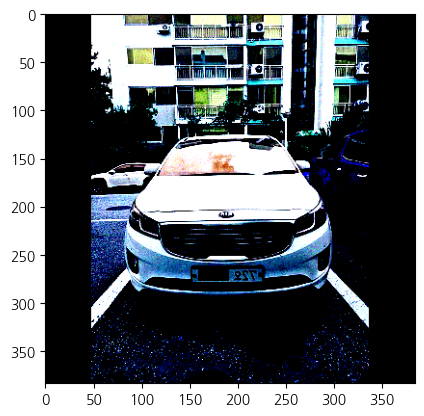

In [6]:
# Mixup 증강 테스트
try:
    cfg = load_yaml("configs/train_highperf.yaml")          # 설정 파일 로드
    train_csv = "data/raw/train.csv"                        # 학습 데이터 CSV 경로
    image_dir = "data/raw/train"                            # 이미지 디렉토리 경로
    df = pd.read_csv(train_csv)                             # CSV 파일 읽기
    
    # 데이터셋 생성
    dataset = HighPerfDocClsDataset(
        df=df.head(50),                                     # 50개 샘플만 사용
        image_dir=image_dir,                                # 이미지 디렉토리 경로
        img_size=cfg['train']['img_size'],                  # 이미지 크기
        epoch=0,                                            # epoch 설정
        total_epochs=cfg['train']['epochs'],                # 전체 epoch 수
        is_train=True,                                      # 학습 모드
        id_col=cfg['data']['id_col'],                       # ID 컬럼명
        target_col=cfg['data']['target_col']                # 타겟 컬럼명
    )
    # 결과 이미지 저장 폴더 생성
    save_dir = 'results/mixup_images'
    os.makedirs(save_dir, exist_ok=True)
    # Mixup 증강 적용 및 시각화
    for i in range(5):                                      # 5개 샘플 시각화
        img, label = dataset[i]                             # 샘플 로드
        img_np = img.permute(1,2,0).numpy()                 # (C, H, W) -> (H, W, C)
        img_np = np.clip(img_np, 0, 1)                      # [0, 1]로 제한
        plt.imshow(img_np)                                  # 이미지 시각화
        plt.title(f'Mixup 샘플 {i+1} / 라벨: {label}', fontproperties=fontprop)  # 라벨 출력 (폰트 적용)
        plt.axis('off')                                     # 축 제거
        plt.savefig(f'{save_dir}/mixup_{i+1}_label_{label}.png', bbox_inches='tight', pad_inches=0.1)  # 이미지 저장
        plt.show()                                          # 이미지 출력
    print('✅ Mixup 증강 테스트 완료')                        # 테스트 완료 메시지
except Exception as e:
    print(f'⚠️ Mixup 증강 테스트 실패: {e}')                  # 에러 메시지 출력

## 🏆 테스트 결과 요약

- Mixup 증강 및 샘플 시각화가 정상적으로 동작하면 ✅, 실패 시 ⚠️ 메시지로 확인 가능합니다.
- GPU 체크, 데이터셋 생성, 증강 적용 등 모든 단계의 결과를 코드 셀 출력과 test_logger에서 확인할 수 있습니다.
- 추가 검증이 필요한 부분은 각 셀의 예외 메시지와 로그를 참고하세요.